In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hints for Problem 1:

a.view(some_dtype) or a.view(dtype=some_dtype) constructs a view of the array’s memory with a different data-type.

SOURCE: https://www.geeksforgeeks.org/ieee-standard-754-floating-point-numbers/

85.125

85 = 1010101

0.125 = 001

85.125 = 1010101.001
       =1.010101001 x 2^6 
       
sign = 0 

1. Single precision:

biased exponent 127+6=133

133 = 10000101

Normalised mantisa = 010101001

we will add 0's to complete the 23 bits

The IEEE 754 Single precision is:

0 10000101 01010100100000000000000

In [2]:
f = np.float32(85.125)
int32bits = f.view(np.int32) #convert 32 bit float to 32 bit integer, store the memory it uses

In [3]:
int32bits

1118453760

In [4]:
print('{:032b}'.format(int32bits)) # print the 32 bit integer in its binary representation

01000010101010100100000000000000


# Hints for Problem 2 and Problem 3:

## 1) How to list indices of a cube 

An example: List the vertices of the unit cube!

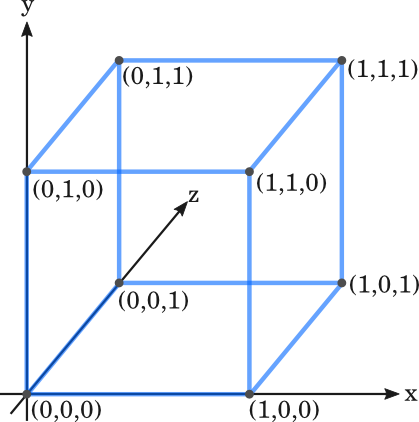

## Method 1: Use for loops

In [5]:
# for example, list the indices of elements arranged in a 3D cube where each index x,y,z can range between 0 and L
print('[x y z]')
L = 1
for x in range(0,L+1):
    for y in range(0,L+1):
        for z in range(0,L+1):
            point_coordinates = np.array([x, y, z])
            print(point_coordinates)

[x y z]
[0 0 0]
[0 0 1]
[0 1 0]
[0 1 1]
[1 0 0]
[1 0 1]
[1 1 0]
[1 1 1]


## Method 2: Use np.meshgrid()

See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid

In [6]:
# for example, list the indices of elements arranged in a 3D cube where each index x,y,z can range between 0 and L
L = 1
nums = range(0,L+1)
x, y, z = np.meshgrid(nums, nums, nums)

In [7]:
x

array([[[0, 0],
        [1, 1]],

       [[0, 0],
        [1, 1]]])

In [8]:
y

array([[[0, 0],
        [0, 0]],

       [[1, 1],
        [1, 1]]])

In [9]:
z

array([[[0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1]]])

In [10]:
point_coordinates = np.vstack((x.flatten(),y.flatten(), z.flatten()))

In [11]:
print('[x y z]')
for i in range(point_coordinates.shape[1]):
    print(point_coordinates[:,i])

[x y z]
[0 0 0]
[0 0 1]
[1 0 0]
[1 0 1]
[0 1 0]
[0 1 1]
[1 1 0]
[1 1 1]


## 2) Filtering arrays

Example: Make all odd numbers in an array negative

In [12]:
arr = np.arange(0, 100,)

In [13]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
signs = (-1.)**np.abs(arr)

In [15]:
arr*signs

array([  0.,  -1.,   2.,  -3.,   4.,  -5.,   6.,  -7.,   8.,  -9.,  10.,
       -11.,  12., -13.,  14., -15.,  16., -17.,  18., -19.,  20., -21.,
        22., -23.,  24., -25.,  26., -27.,  28., -29.,  30., -31.,  32.,
       -33.,  34., -35.,  36., -37.,  38., -39.,  40., -41.,  42., -43.,
        44., -45.,  46., -47.,  48., -49.,  50., -51.,  52., -53.,  54.,
       -55.,  56., -57.,  58., -59.,  60., -61.,  62., -63.,  64., -65.,
        66., -67.,  68., -69.,  70., -71.,  72., -73.,  74., -75.,  76.,
       -77.,  78., -79.,  80., -81.,  82., -83.,  84., -85.,  86., -87.,
        88., -89.,  90., -91.,  92., -93.,  94., -95.,  96., -97.,  98.,
       -99.])

Example: set all elements of an array greater than 2 to 0

In [16]:
arr = np.arange(0, 100,)

In [17]:
arr[arr>2] = 0. 

In [18]:
arr

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 3) Using a decorator to vectorize an element-wise operation

Example: set odd numbers in an array to 0

In [19]:
x = np.arange(0, 100, 1)

@np.vectorize
def vectorize__zero_odd(x):
    if x % 2 != 0:
        x = 0.
    return x
vectorize__zero_odd(x)

array([ 0,  0,  2,  0,  4,  0,  6,  0,  8,  0, 10,  0, 12,  0, 14,  0, 16,
        0, 18,  0, 20,  0, 22,  0, 24,  0, 26,  0, 28,  0, 30,  0, 32,  0,
       34,  0, 36,  0, 38,  0, 40,  0, 42,  0, 44,  0, 46,  0, 48,  0, 50,
        0, 52,  0, 54,  0, 56,  0, 58,  0, 60,  0, 62,  0, 64,  0, 66,  0,
       68,  0, 70,  0, 72,  0, 74,  0, 76,  0, 78,  0, 80,  0, 82,  0, 84,
        0, 86,  0, 88,  0, 90,  0, 92,  0, 94,  0, 96,  0, 98,  0])